In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io,transform
INPUT_SIZE = 512

In [2]:
base_folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray'
folder = base_folder + r'\radiopaedia'
files = os.listdir(folder)
dims = np.zeros((len(files),3),'uint16')
count = 0
print('Number of files in the ' + folder + ' folder = ', len(files))
for file in files:
    filename = folder + '\\' + file
    img = io.imread(filename)
    dims[count,0] = img.shape[0]
    dims[count,1] = img.shape[1]
    if len(img.shape) == 2:
        dims[count,2] = 1
    else:
        dims[count,2] = img.shape[2]
    count += 1

print('Smallest height = ', min(dims[:,0]))
print('Largest height = ', max(dims[:,0]))
print('Average height = ', np.mean(dims[:,0]))

print('Smallest width = ', min(dims[:,1]))
print('Largest width = ', max(dims[:,1]))
print('Average width = ', np.mean(dims[:,1]))

print('Largest number of planes = ', max(dims[:,2]))
print('Number of 4-plane images = ',sum(dims[:,2]//4))


Number of files in the C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\radiopaedia folder =  40
Smallest height =  390
Largest height =  4300
Average height =  1761.925
Smallest width =  492
Largest width =  4298
Average width =  1983.3
Largest number of planes =  4
Number of 4-plane images =  2


In [3]:
base_folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray'
folder = base_folder + r'\italian radiological society'
files = os.listdir(folder)
dims = np.zeros((len(files),3),'uint16')
count = 0
print('Number of files in the ' + folder + ' folder = ', len(files))
for file in files:
    filename = folder + '\\' + file
    img = io.imread(filename)
    dims[count,0] = img.shape[0]
    dims[count,1] = img.shape[1]
    if len(img.shape) == 2:
        dims[count,2] = 1
    else:
        dims[count,2] = img.shape[2]
    count += 1

print('Smallest height = ', min(dims[:,0]))
print('Largest height = ', max(dims[:,0]))
print('Average height = ', np.mean(dims[:,0]))

print('Smallest width = ', min(dims[:,1]))
print('Largest width = ', max(dims[:,1]))
print('Average width = ', np.mean(dims[:,1]))

print('Largest number of planes = ', max(dims[:,2]))
print('Number of 4-plane images = ',sum(dims[:,2]//4))


Number of files in the C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society folder =  60


ValueError: Could not find a format to read the specified file in mode 'i'

In [4]:
base_folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray'
folder = base_folder + r'\kaggle\images'
files = os.listdir(folder)
dims = np.zeros((len(files),3),'uint16')
count = 0
print('Number of files in the ' + folder + ' folder = ', len(files))
for file in files:
    filename = folder + '\\' + file
    img = io.imread(filename)
    dims[count,0] = img.shape[0]
    dims[count,1] = img.shape[1]
    if len(img.shape) == 2:
        dims[count,2] = 1
    else:
        dims[count,2] = img.shape[2]
    count += 1

print('Smallest height = ', min(dims[:,0]))
print('Largest height = ', max(dims[:,0]))
print('Average height = ', np.mean(dims[:,0]))

print('Smallest width = ', min(dims[:,1]))
print('Largest width = ', max(dims[:,1]))
print('Average width = ', np.mean(dims[:,1]))

print('Largest number of planes = ', max(dims[:,2]))
print('Number of 4-plane images = ',sum(dims[:,2]//4))


Number of files in the C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images folder =  357
Smallest height =  156
Largest height =  4757
Average height =  1310.7535014005603
Smallest width =  157
Largest width =  5623
Average width =  1423.9103641456581
Largest number of planes =  4
Number of 4-plane images =  42


In [5]:
base_folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray'
folder = base_folder + r'\nih\images_005\images'
files = os.listdir(folder)
dims = np.zeros((len(files),3),'uint16')
count = 0
print('Number of files in the ' + folder + ' folder = ', len(files))
for file in files:
    filename = folder + '\\' + file
    img = io.imread(filename)
    dims[count,0] = img.shape[0]
    dims[count,1] = img.shape[1]
    if len(img.shape) == 2:
        dims[count,2] = 1
    else:
        dims[count,2] = img.shape[2]
    count += 1

print('Smallest height = ', min(dims[:,0]))
print('Largest height = ', max(dims[:,0]))
print('Average height = ', np.mean(dims[:,0]))

print('Smallest width = ', min(dims[:,1]))
print('Largest width = ', max(dims[:,1]))
print('Average width = ', np.mean(dims[:,1]))

print('Largest number of planes = ', max(dims[:,2]))
print('Number of 4-plane images = ',sum(dims[:,2]//4))


Number of files in the C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_005\images folder =  10000


KeyboardInterrupt: 

In [6]:
def preprocess(img):
    # Normalize the image in 0-255 range and make it 3-plane
    if len(img.shape)==2:
        img_gray = np.float32(img)
    else:
        img_gray = np.float32(img[:,:,0])
        
    img_gray -= np.amin(img_gray)
    img_gray /= np.amax(img_gray)
    img_gray = np.uint8(255*img_gray)   
    img = np.stack((img_gray,img_gray,img_gray),axis=2)
    
    # Crop
    sumrows = np.sum(img_gray,0)
    sumrows2 = 0*sumrows
    sumrows2[:-1] = sumrows[1:]
    sumcols = np.sum(img_gray,1)
    sumcols2 = 0*sumcols
    sumcols2[:-1] = sumcols[1:]
    diffcols = sumrows2-sumrows
    diffrows = sumcols2-sumcols
    #fig2 = plt.figure(figsize=[8,8])
    #plt.plot(diffcols)
    #fig3 = plt.figure(figsize=[8,8])
    #plt.plot(diffrows)
    #print(diffcols[112])
    boundaries = [0,0,img_gray.shape[0]-1,img_gray.shape[1]-1]
    # Top margin
    for row in range(len(diffrows)):  
        if diffrows[row] > 1000:
            break
        else:
            boundaries[0] = row

    #Bottom margin        
    for row in range(len(diffrows)-2,0,-1):
        if diffrows[row] > 1000:
            break
        else:
            boundaries[2] = row

    # Left Margin
    for col in range(len(diffcols)):
        if diffcols[col] > 1000:
            break
        else:
            boundaries[1] = col

    #Right Margin        
    for col in range(len(diffcols)-2,0,-1):
        if diffcols[col] > 1000:
            break
        else:
            boundaries[3] = col
    #print(boundaries)
    img = img[boundaries[0]:boundaries[2],boundaries[1]:boundaries[3],:]
    
    # Resize
    img = transform.resize(img,(512,512))
    img = np.uint8(255*img)   
    return img


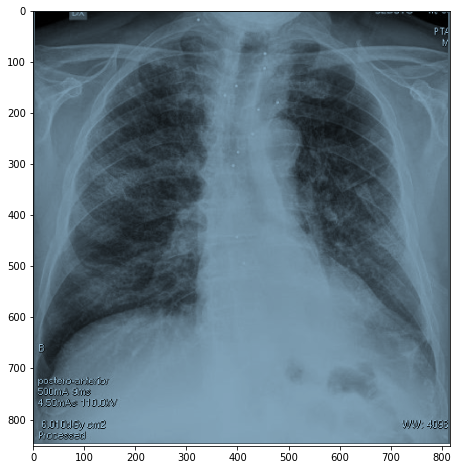

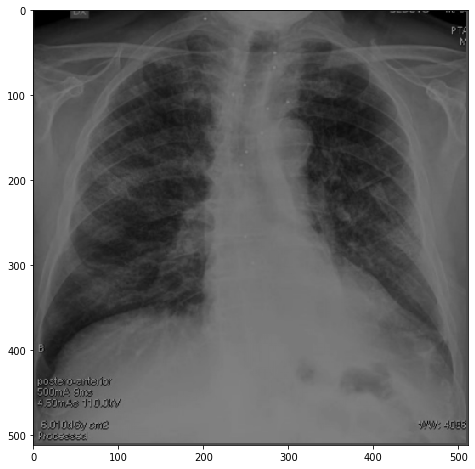

In [7]:
folder  = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society'
#filename = folder + '\\' + '72897418-E68C-47CA-B8F9-8EBAD8073476.jpeg'
#folder  = r'E:\work\COVID19\radiopaedia'
filename = folder + '\\' + '1-3.png'


img = io.imread(filename)
fig1 = plt.figure(figsize=[8,8])
plt.imshow(img)


fig2 = plt.figure(figsize=[8,8])
plt.imshow(preprocess(img))
    

In [8]:
base_folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray'
folders = [r'kaggle\images','italian radiological society','radiopaedia']
for folder in folders:
    foldername = base_folder + '\\' + folder
    filelist = os.listdir(foldername)
    try:
        os.mkdir(foldername + r'\edited')
    except:
        print('Folder edited already exists in '+ foldername)
    for file in filelist:
        if file=='edited':
            continue
        filename = foldername + '\\' + file
        saveFileName = foldername + r'\edited' + '\\' + file.split('.')[0] + '.jpg'
        
        if os.path.isfile(saveFileName):
            print(filename,'already processed')
            continue
        print('Processing...', filename)
        img = io.imread(filename)
        img = preprocess(img)

        io.imsave(saveFileName,img)

Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\1-s2.0-S0140673620303706-fx1_lrg.jpg
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\1-s2.0-S0929664620300449-gr2_lrg-a.jpg already processed
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\1-s2.0-S0929664620300449-gr2_lrg-b.jpg already processed
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\1-s2.0-S0929664620300449-gr2_lrg-c.jpg already processed
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\1-s2.0-S0929664620300449-gr2_lrg-d.jpg already processed
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\1-s2.0-S0929664620300449-gr3_lrg-a.jpg already processed
C:\Users\arung\OneDrive\

Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\4ad30bc6-2da0-4f84-bc9b-62acabfd518a.annot.original.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\5083A6B7-8983-472E-A427-570A3E03DDEE.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\58cb9263f16e94305c730685358e4e_jumbo.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg
Processing

Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\cavitating-pneumonia-4-day28-PA.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\chlamydia-pneumonia-L.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\chlamydia-pneumonia-PA.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\ciaa199.pdf-001-a.png
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\ciaa199.pdf-001-b.png already processed
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\ciaa199.pdf-001-c.png already processed
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-caso-70-1-L.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-caso-70-1-PA.jpg
Processing... C:\Users\a

Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-pneumonia-progression-and-regression-day28.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-pneumonia-progression-and-regression-day6.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-pneumonia-rapidly-progressive-12-hours.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-pneumonia-rapidly-progressive-3-days.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-pneumonia-rapidly-progressive-admission.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-1.jpg
Processing

Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-carinii-pneumonia-1-L.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-carinii-pneumonia-1-PA.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-jiroveci-pneumonia-2.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-jiroveci-pneumonia-4-L.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-jiroveci-pneumonia-4-PA.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-jirovecii-pneumonia-2.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-jirovecii-pneumonia-3-1.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\kaggle\images\pneumocystis-jirovecii-pneumonia-3-2.jpg
Processing... C:\Users\arung\OneDrive\Des

Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\01E392EE-69F9-4E33-BFCE-E5C968654078-1068x796.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C-1068x1083.jpeg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\1-1.jpg
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\1-12.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\1-14.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\1-15.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\1-19.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiological society\1-21.png
Processing... C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\italian radiologic

ValueError: Could not find a format to read the specified file in mode 'i'

In [34]:
filename

'E:\\work\\COVID19\\covid-chest-xray\\images\\edited'